In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from pathlib import Path
from datetime import date, timedelta
import re
import multiprocessing as mult
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
data = pd.read_feather('data_proc_ver_2.feather')
data = data.drop(['level_0', 'index'], axis = 1)

In [3]:
data

,Game,Trial,Username,processed_text,target
0,196,1,adamhorsfall,[🟩🟩🟩🟩🟩],REBUS
1,196,1,TheRealPembo,[🟩🟩🟩🟩🟩],REBUS
2,196,1,grenow,[🟩🟩🟩🟩🟩],REBUS
3,196,1,Yummhh__,[🟩🟩🟩🟩🟩],REBUS
4,196,1,TowerGuardGames,[🟩🟩🟩🟩🟩],REBUS
...,...,...,...,...,...
6923123,515,7,moona_moony_,"[🟨⬜⬜⬜🟨, ⬜🟨🟨⬜⬜, ⬜⬜🟨🟨🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER
6923124,515,7,JonMDexter,"[⬜⬜⬜⬜🟩, ⬜⬜⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩🟩🟩🟩, ⬜🟩🟩🟩🟩]",BAKER
6923125,515,7,KuronaNuva,"[⬜🟨🟨⬜🟨, 🟨🟩🟨⬜⬜, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER
6923126,515,7,KZYONE,"[🟨🟨🟨⬜⬜, ⬜🟨🟨🟨⬜, ⬜⬜🟨🟨🟨, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER


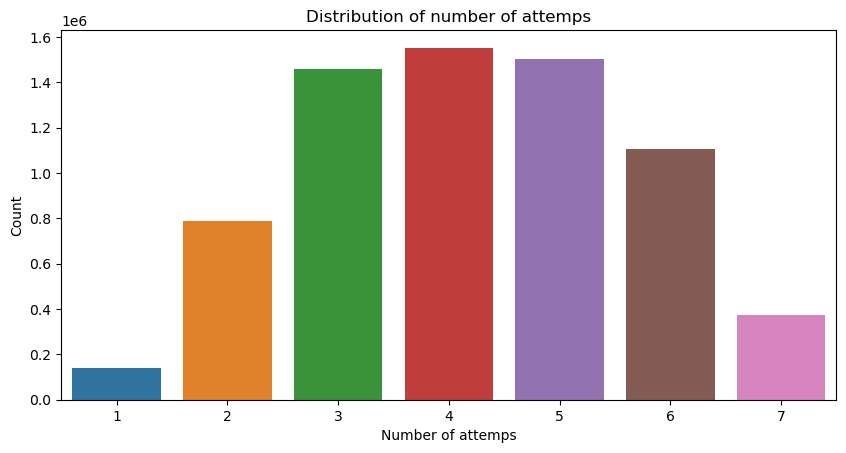

In [4]:
length_plot = sns.countplot(data = data, x = 'Trial')
length_plot.set_title("Distribution of number of attemps")
length_plot.set_xlabel("Number of attemps")
length_plot.set_ylabel("Count");
length_plot.figure.set_figwidth(10);

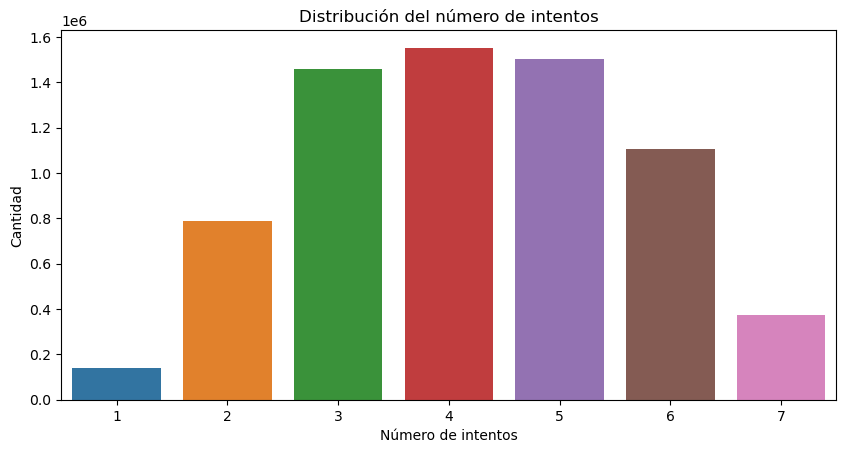

In [5]:
length_plot = sns.countplot(data = data, x = 'Trial')
length_plot.set_title("Distribución del número de intentos")
length_plot.set_xlabel("Número de intentos")
length_plot.set_ylabel("Cantidad");
length_plot.figure.set_figwidth(10);

In [6]:
data['Trial'].describe()

count    6.923128e+06
mean     4.199506e+00
std      1.466357e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      7.000000e+00
Name: Trial, dtype: float64

In [7]:
data.groupby('Trial').describe()

Game                                                          
           count        mean        std    min    25%    50%    75%    max
Trial                                                                     
1       139077.0  276.911797  69.273148  196.0  229.0  253.0  303.0  515.0
2       789447.0  313.845469  85.409394  196.0  246.0  293.0  365.0  515.0
3      1459465.0  350.515397  91.648357  196.0  271.0  347.0  428.0  515.0
4      1552646.0  355.169896  92.107104  196.0  275.0  355.0  435.0  515.0
5      1501858.0  351.896024  90.649388  196.0  274.0  351.0  428.0  515.0
6      1106965.0  328.174143  86.543753  196.0  255.0  315.0  396.0  515.0
7       373670.0  301.835001  84.263897  196.0  236.0  274.0  354.0  515.0

## Winrate
We can see that all the games end with a winning move.

In [8]:
data["processed_text"].str[-1].describe()

count     6923128
unique        238
top         🟩🟩🟩🟩🟩
freq      6549458
Name: processed_text, dtype: object

## Distrution of guesses, misses and misplacements

### First attempt

In [9]:
data['processed_text'].str[0]

0          🟩🟩🟩🟩🟩
1          🟩🟩🟩🟩🟩
2          🟩🟩🟩🟩🟩
3          🟩🟩🟩🟩🟩
4          🟩🟩🟩🟩🟩
           ...  
6923123    🟨⬜⬜⬜🟨
6923124    ⬜⬜⬜⬜🟩
6923125    ⬜🟨🟨⬜🟨
6923126    🟨🟨🟨⬜⬜
6923127    ⬜⬜🟨⬜⬜
Name: processed_text, Length: 6923128, dtype: object

In [10]:
first_attemps = pd.DataFrame(data['processed_text'].str[0])

In [11]:
first_attemps['green_count'] = first_attemps['processed_text'].str.count('🟩')
first_attemps['yellow_count'] = first_attemps['processed_text'].str.count('🟨')
first_attemps['black_count'] = first_attemps['processed_text'].str.count('⬜')

In [12]:
first_attemps.head()

,processed_text,green_count,yellow_count,black_count
0,🟩🟩🟩🟩🟩,5,0,0
1,🟩🟩🟩🟩🟩,5,0,0
2,🟩🟩🟩🟩🟩,5,0,0
3,🟩🟩🟩🟩🟩,5,0,0
4,🟩🟩🟩🟩🟩,5,0,0


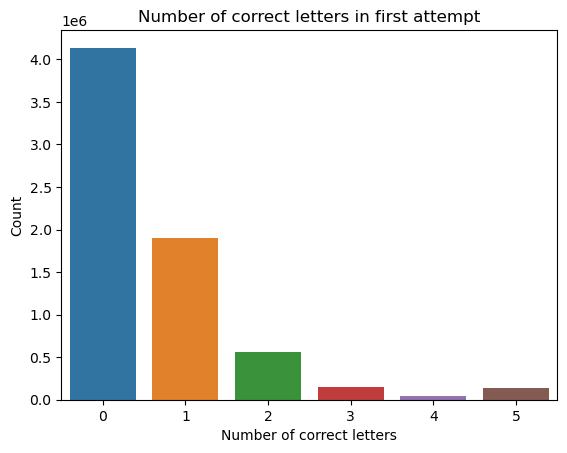

In [13]:
fa_green = sns.countplot(data = first_attemps, x = 'green_count')
fa_green.set_title("Number of correct letters in first attempt")
fa_green.set_xlabel("Number of correct letters")
fa_green.set_ylabel("Count");

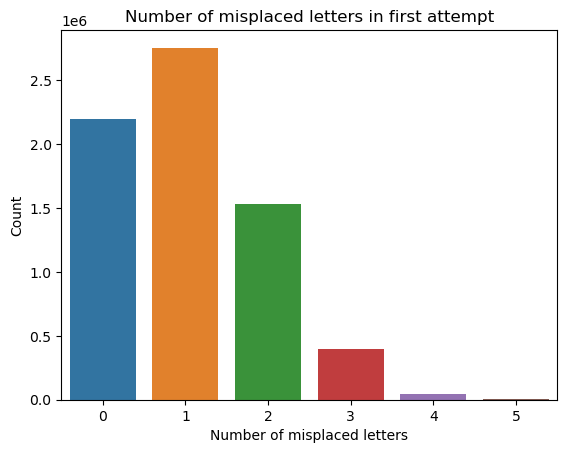

In [14]:
fa_yellow = sns.countplot(data = first_attemps, x = 'yellow_count')
fa_yellow.set_title("Number of misplaced letters in first attempt")
fa_yellow.set_xlabel("Number of misplaced letters")
fa_yellow.set_ylabel("Count");

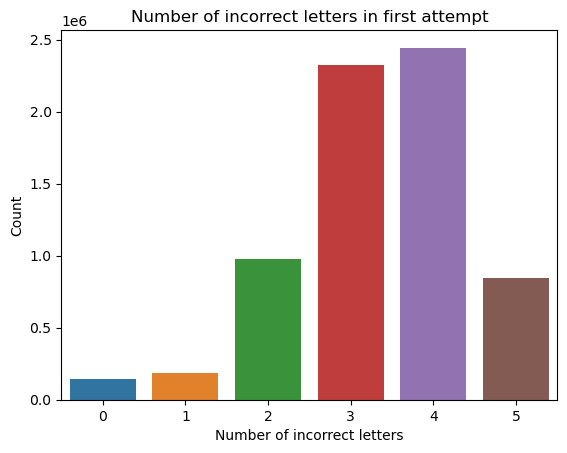

In [15]:
fa_black = sns.countplot(data = first_attemps, x = 'black_count')
fa_black.set_title("Number of incorrect letters in first attempt")
fa_black.set_xlabel("Number of incorrect letters")
fa_black.set_ylabel("Count");

### Across all attemps

Attemp number six is not used due to it consisting of only wins.

In [16]:
attemps = first_attemps.copy()
attemps['attemp'] = 1
attemps = attemps.drop(columns=['processed_text'])

In [17]:
for i in range(1,6):
    aux = pd.DataFrame(data['processed_text'].str[i])
    aux = aux.dropna()
    aux['green_count'] = aux['processed_text'].str.count('🟩')
    aux['yellow_count'] = aux['processed_text'].str.count('🟨')
    aux['black_count'] = aux['processed_text'].str.count('⬜')
    aux = aux.drop(columns=['processed_text'])
    aux['attemp'] = i + 1
    attemps = pd.concat([attemps, aux])

#### Green squares

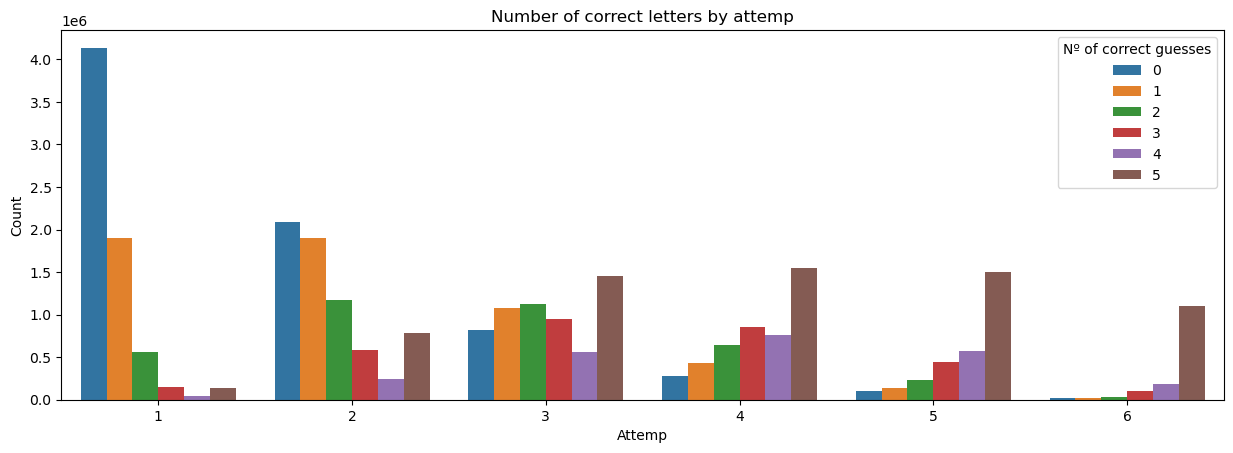

In [18]:
overall_green = sns.countplot(data = attemps, x = 'attemp', hue = 'green_count')
overall_green.set_title("Number of correct letters by attemp")
overall_green.set_xlabel("Attemp")
overall_green.set_ylabel("Count");
plt.legend(title='Nº of correct guesses');
overall_green.figure.set_figwidth(15);

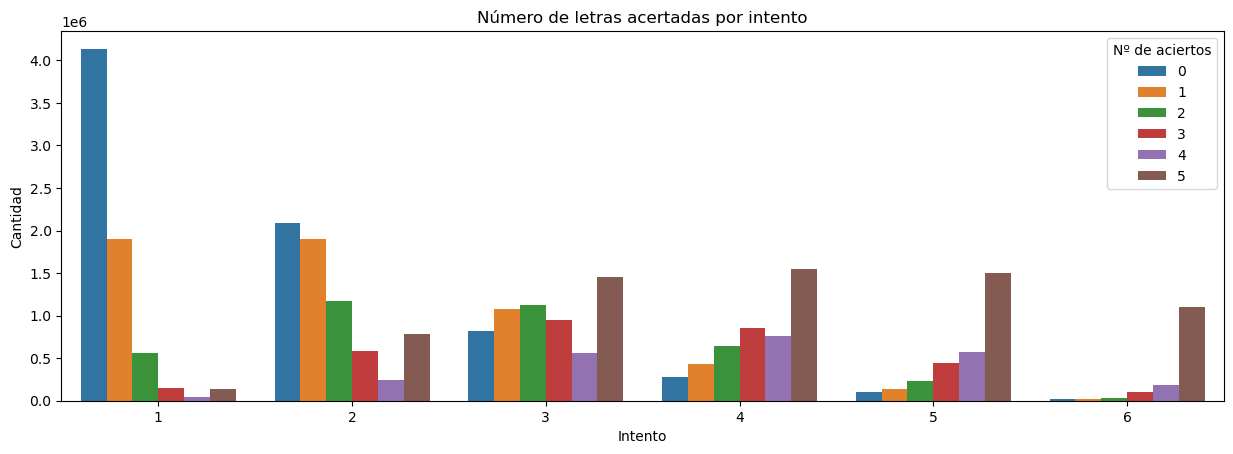

In [19]:
overall_green = sns.countplot(data = attemps, x = 'attemp', hue = 'green_count')
overall_green.set_title("Número de letras acertadas por intento")
overall_green.set_xlabel("Intento")
overall_green.set_ylabel("Cantidad");
plt.legend(title='Nº de aciertos');
overall_green.figure.set_figwidth(15);

In [20]:
#Now we will show the proportions across all attemps
green_prop = attemps.drop(columns = ['yellow_count', 'black_count']).groupby(['attemp', 'green_count']).value_counts() / attemps.groupby('attemp').size() * 100

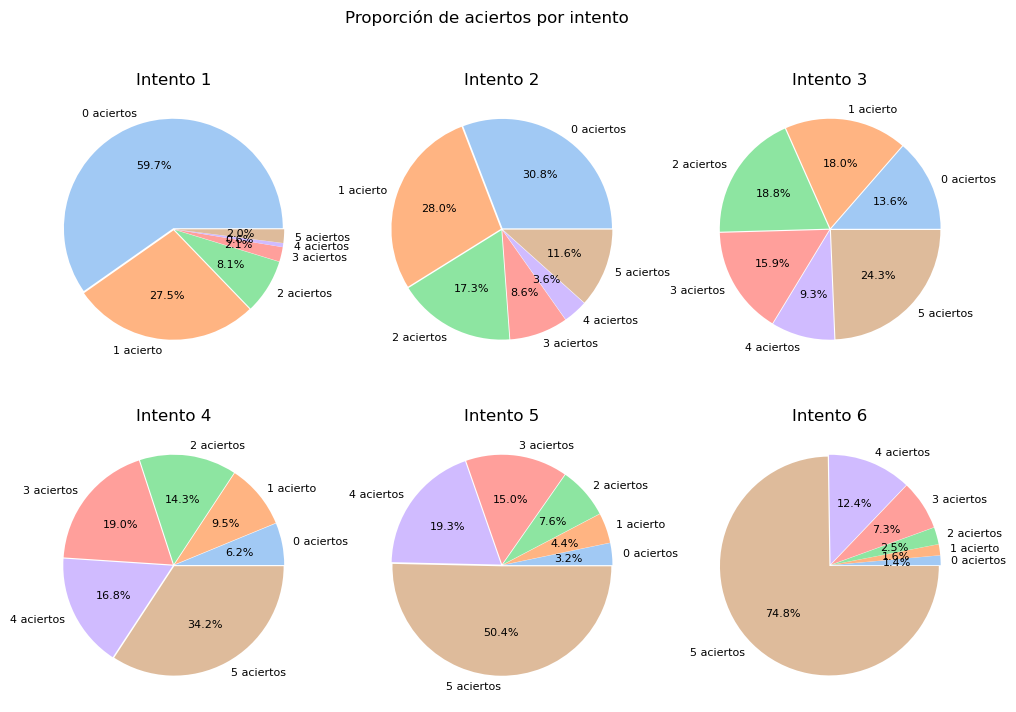

In [24]:
labels = ['0 aciertos', '1 acierto', '2 aciertos', '3 aciertos', '4 aciertos', '5 aciertos']
colors = sns.color_palette('pastel')[0:6]
fig, axs = plt.subplots(2,3, figsize = (12,8))
for i in range(0, 6):
    values = green_prop.values[6*i:6*i+6]
    axs[i // 3,i % 3].pie(values, labels = labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 8}, 
                          explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
    axs[i // 3,i % 3].set_title('Intento ' + str(i+1))
fig.suptitle('Proporción de aciertos por intento')
plt.show()

#### Yellow squares

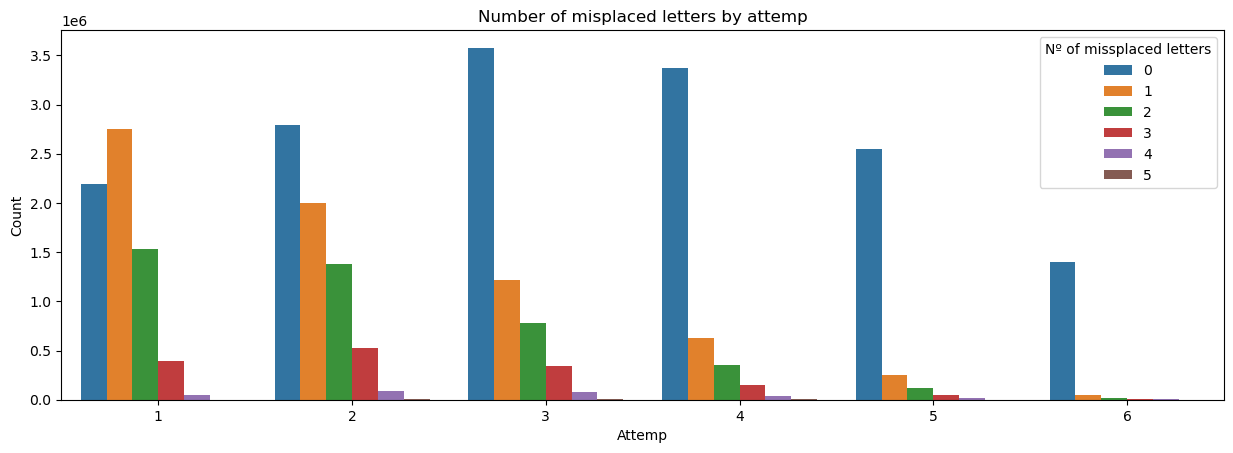

In [25]:
overall_yellow = sns.countplot(data = attemps, x = 'attemp', hue = 'yellow_count')
overall_yellow.set_title("Number of misplaced letters by attemp")
overall_yellow.set_xlabel("Attemp")
overall_yellow.set_ylabel("Count");
plt.legend(title='Nº of missplaced letters');
overall_yellow.figure.set_figwidth(15);

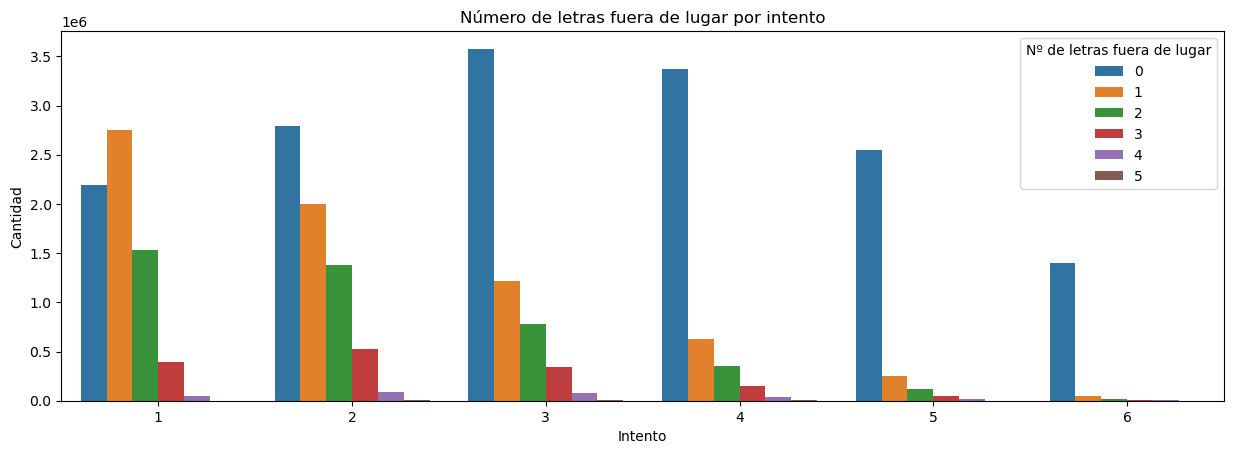

In [26]:
overall_yellow = sns.countplot(data = attemps, x = 'attemp', hue = 'yellow_count')
overall_yellow.set_title("Número de letras fuera de lugar por intento")
overall_yellow.set_xlabel("Intento")
overall_yellow.set_ylabel("Cantidad");
plt.legend(title='Nº de letras fuera de lugar');
overall_yellow.figure.set_figwidth(15);

In [27]:
yellow_prop = attemps.drop(columns = ['green_count', 'black_count']).groupby(['attemp', 'yellow_count']).value_counts() / attemps.groupby('attemp').size() * 100

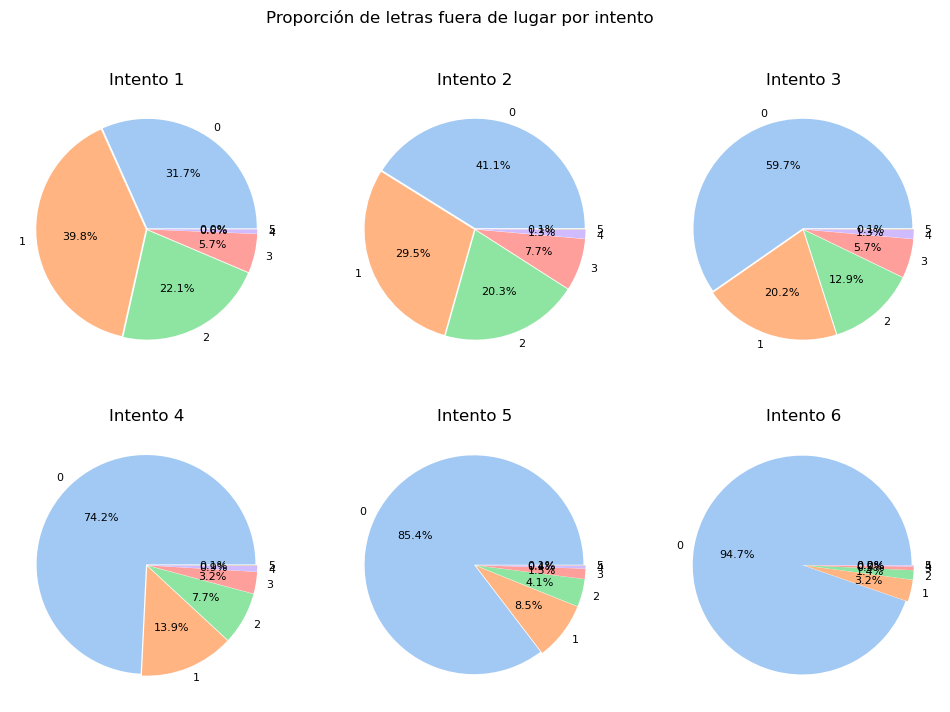

In [28]:
labels = ['0', '1', '2', '3', '4', '5']
colors = sns.color_palette('pastel')[0:6]
fig, axs = plt.subplots(2,3, figsize = (12,8))
for i in range(0, 6):
    values = yellow_prop.values[6*i:6*i+6]
    axs[i // 3,i % 3].pie(values, labels = labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 8}, 
                          explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
    axs[i // 3,i % 3].set_title('Intento ' + str(i+1))
fig.suptitle('Proporción de letras fuera de lugar por intento')
plt.show()

#### Black squares

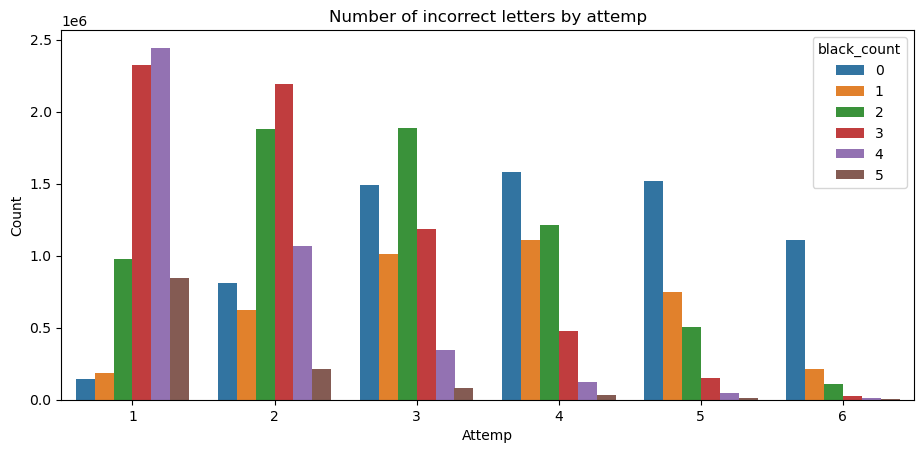

In [29]:
overall_black = sns.countplot(data = attemps, x = 'attemp', hue = 'black_count')
overall_black.set_title("Number of incorrect letters by attemp")
overall_black.set_xlabel("Attemp")
overall_black.set_ylabel("Count");
overall_black.figure.set_figwidth(11);

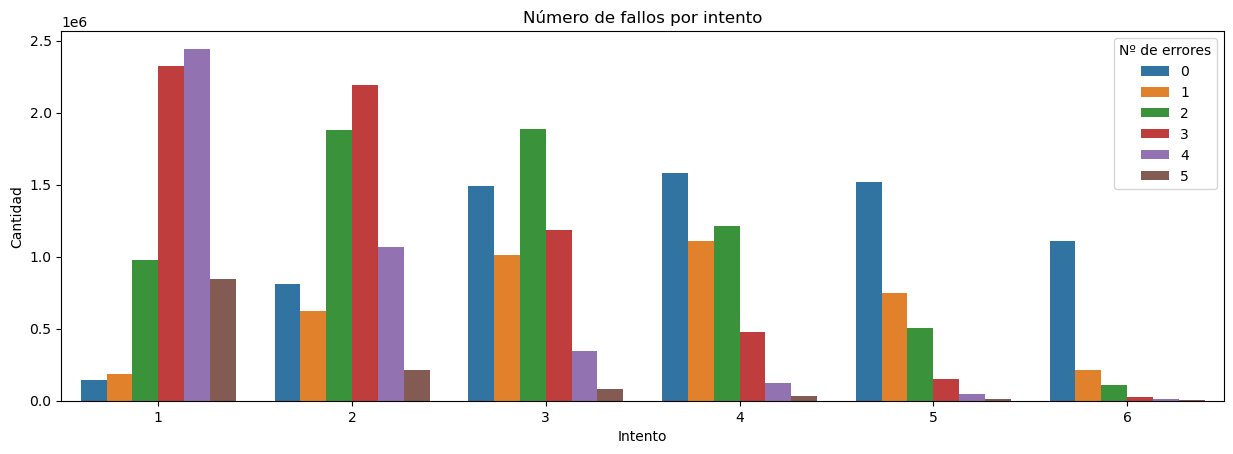

In [30]:
overall_black = sns.countplot(data = attemps, x = 'attemp', hue = 'black_count')
overall_black.set_title("Número de fallos por intento")
overall_black.set_xlabel("Intento")
overall_black.set_ylabel("Cantidad");
plt.legend(title='Nº de errores');
overall_black.figure.set_figwidth(15);

In [31]:
black_prop = attemps.drop(columns = ['green_count', 'yellow_count']).groupby(['attemp', 'black_count']).value_counts() / attemps.groupby('attemp').size() * 100

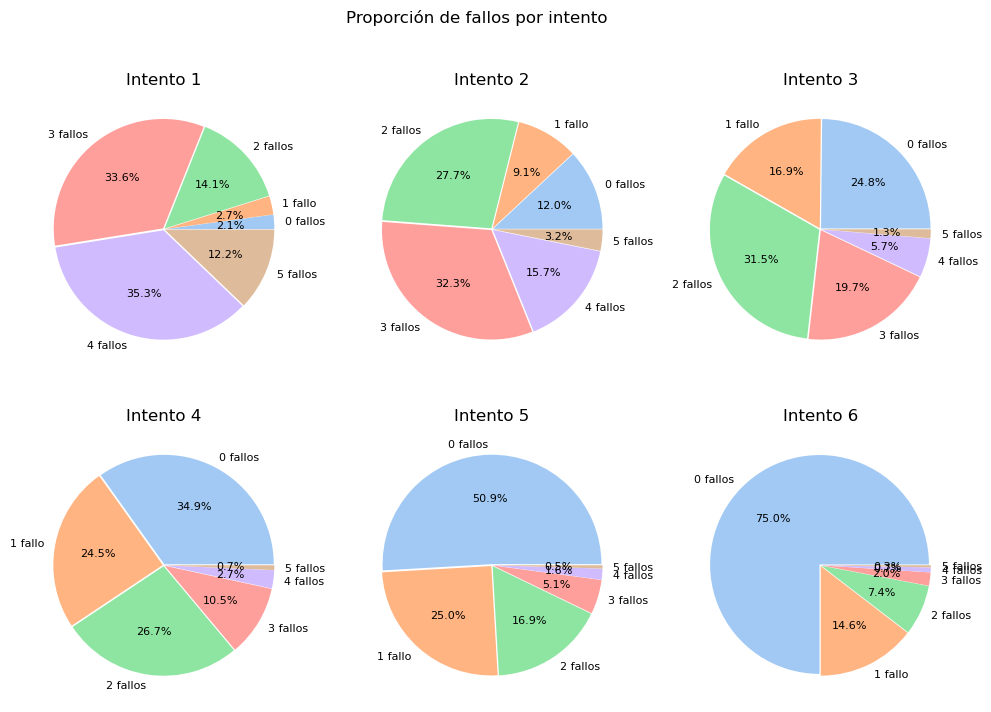

In [32]:
labels = ['0 fallos', '1 fallo', '2 fallos', '3 fallos', '4 fallos', '5 fallos']
colors = sns.color_palette('pastel')[0:6]
fig, axs = plt.subplots(2,3, figsize = (12,8))
for i in range(0, 6):
    values = black_prop.values[6*i:6*i+6]
    axs[i // 3,i % 3].pie(values, labels = labels, colors = colors, autopct='%1.1f%%', textprops={'fontsize': 8}, 
                          explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
    axs[i // 3,i % 3].set_title('Intento ' + str(i+1))
fig.suptitle('Proporción de fallos por intento')
plt.show()

### Distribution of the means

In [30]:
green_mean = attemps.groupby(['attemp'])['green_count'].mean().values
yellow_mean = attemps.groupby(['attemp'])['yellow_count'].mean().values
black_mean = attemps.groupby(['attemp'])['black_count'].mean().values

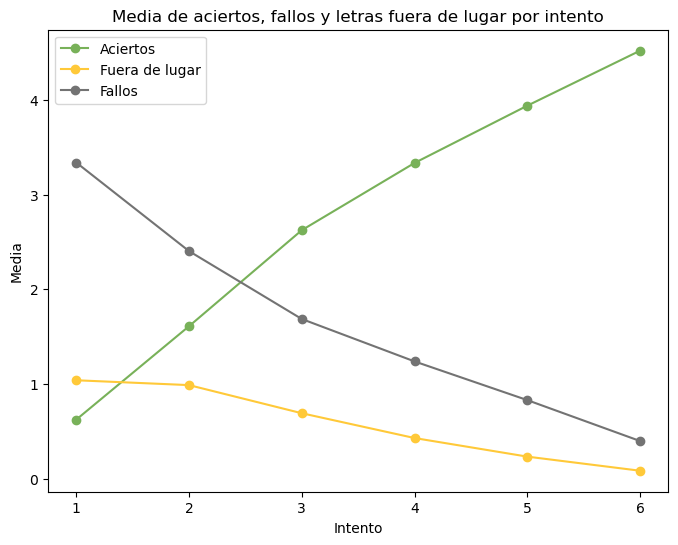

In [31]:
x = range(1,7)
plt.figure(figsize=(8,6))
plt.plot(x, green_mean, 'o-' , label = "Aciertos", color = '#78B159')
plt.plot(x, yellow_mean, 'o-' , label = "Fuera de lugar", color = '#FFC939')
plt.plot(x, black_mean, 'o-' , label = "Fallos", color = '#737373')
plt.title('Media de aciertos, fallos y letras fuera de lugar por intento')
plt.xlabel('Intento')
plt.ylabel('Media')
plt.legend();

## Sorting by words

Let's see if any of the target words repeat themselves:

In [32]:
data['target'].describe()

count     6923128
unique        320
top         LIGHT
freq        32183
Name: target, dtype: object

Now in order to properly visualize the distribution of games we will split the dataset into 6 different batches.

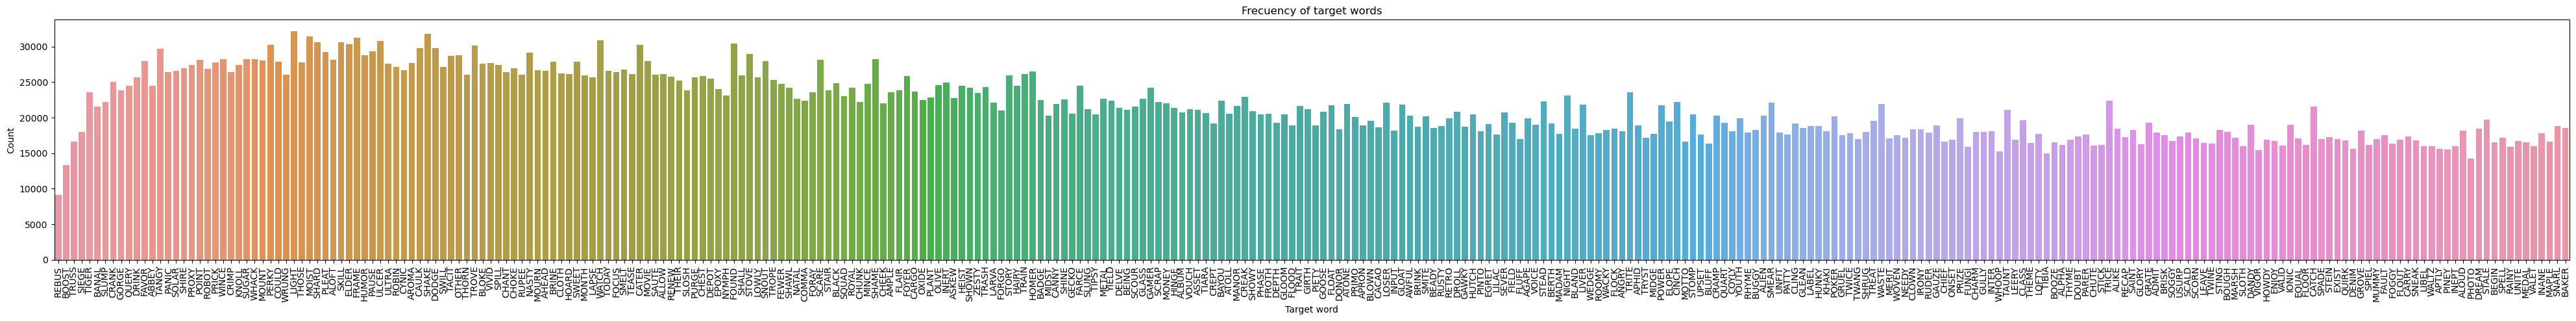

In [33]:
word_plot = sns.countplot(data = data, x = 'target')
word_plot.set_xlabel("Target word")
word_plot.set_ylabel("Count")
word_plot.set_title("Frecuency of target words")
word_plot.set_xticklabels(labels = word_plot.get_xticklabels() ,rotation = 90)
word_plot.figure.set_figwidth(50);

## Mean game length

Now we will continue to analize the mean game length for each game in our dataset.

In [34]:
mean_length = data.groupby('target', sort = False)['Trial'].mean()
mean_length = mean_length.to_frame()
mean_length.reset_index(inplace = True)

In [35]:
mean_val = data['Trial'].mean()

In [36]:
mean_length['Above'] = mean_length['Trial'].apply(lambda x: x-mean_val if x >= mean_val else 0)
mean_length['Less'] = mean_length['Trial'].apply(lambda x: x-mean_val if x < mean_val else 0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17144\1742143649.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(mean_val + tick, 2) for tick in ticks])


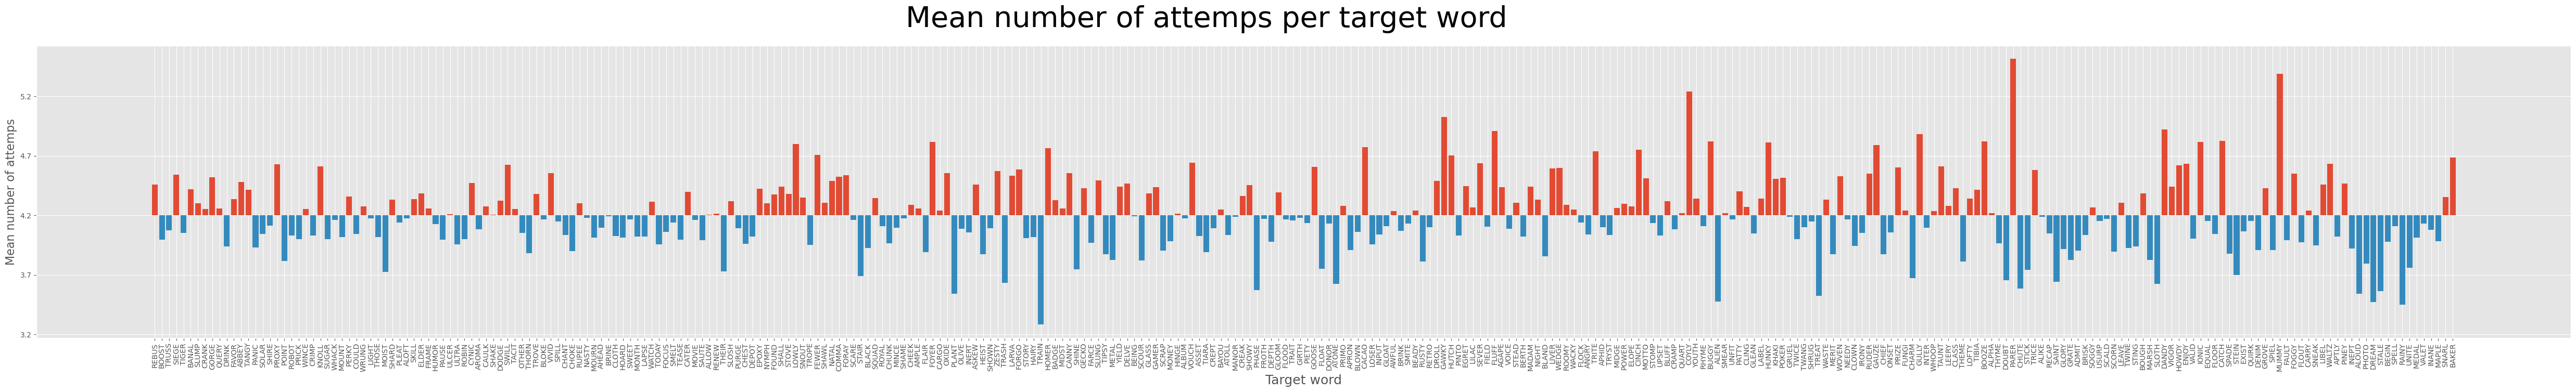

In [37]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(mean_length['target'], mean_length['Above'])
ax.bar(mean_length['target'], mean_length['Less'])
plt.xticks(rotation=90)
plt.tight_layout()
ticks = ax.get_yticks()
ax.set_yticklabels([round(mean_val + tick, 2) for tick in ticks])
fig.set_size_inches(55, 7)
fig.suptitle('Mean number of attemps per target word', fontsize=40, y = 1.08)
plt.xlabel('Target word', fontsize=18)
plt.ylabel('Mean number of attemps', fontsize=16)
plt.show()

## Short and long games

In [28]:
count_length = data.groupby('target', sort = False)['Trial'].apply(lambda x: (x>mean_val).sum())
count_length = count_length.to_frame()
count_length.reset_index(inplace = True)

count_less = data.groupby('target', sort = False)['Trial'].apply(lambda x: (x<=mean_val).sum())
count_less = count_less.to_frame()
count_less.reset_index(inplace = True)
count_less['long'] = count_length['Trial']

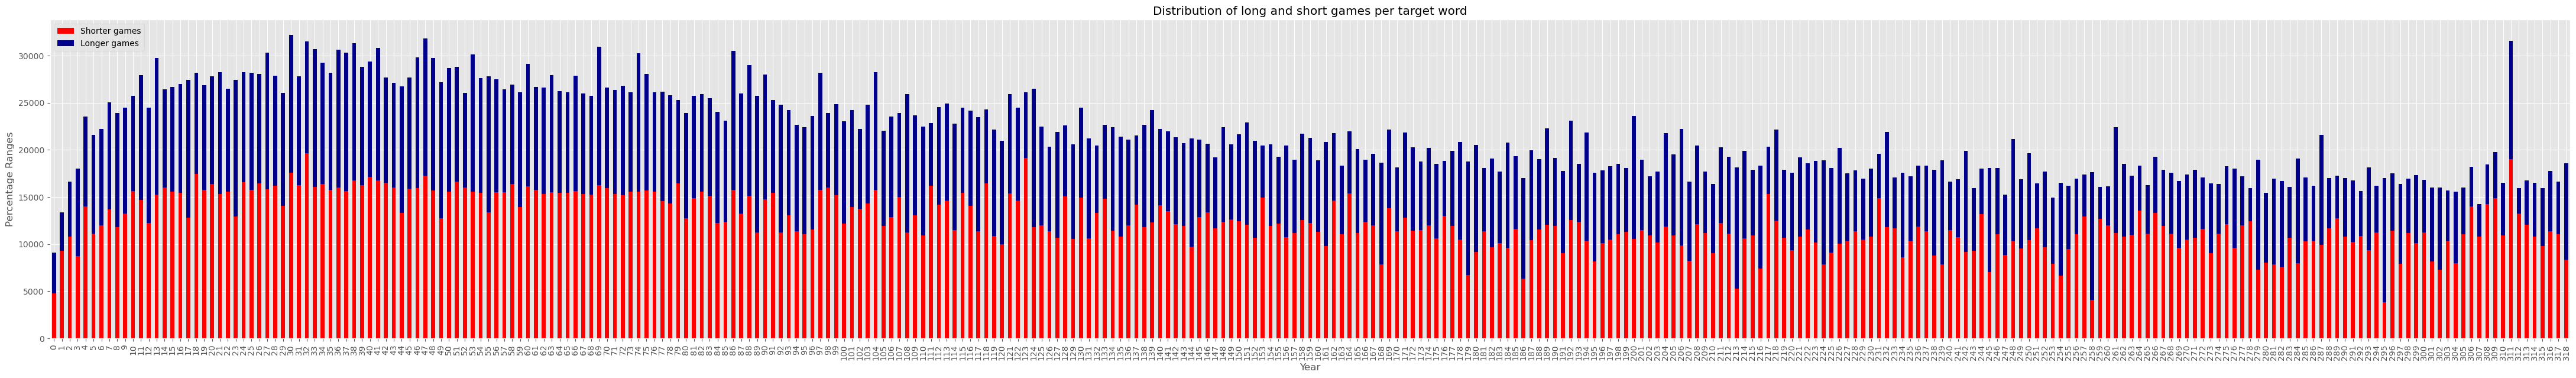

In [29]:
count_less.set_index('target')
count_less = count_less.rename(columns={"Trial": "Shorter games","long": "Longer games",})
count_less.set_index('target')
count_less.plot(kind = 'bar', stacked = True, color = ['red', 'darkblue'])
plt.title('Distribution of long and short games per target word')
plt.xlabel('Year')
plt.ylabel('Percentage Ranges')
fig = plt.gcf()
fig.set_size_inches(55, 7)